## Our objective is to build a classifier that can accurately classify a person with Parkinson's disease based on audio signals detected during early screening.

### All of the Imports

In [5]:
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.calibration import CalibrationDisplay

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix,roc_curve, roc_auc_score, classification_report, precision_score, recall_score,f1_score


In [6]:
# pip install -U scikit-learn --user
# pip install imblearn

### Creating Dataframe

In [7]:
os.getcwd()

'C:\\Users\\Matthew Benvenuto\\Downloads'

In [8]:
raw =pd.read_csv(os.path.join(os.getcwd(),'Parkinson_data.csv'))


In [9]:
raw.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
raw.shape

(195, 24)

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    int64  
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [12]:
raw.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [13]:
raw.describe()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.000000,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,56.435804,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,1.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,49.500000,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,98.000000,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,146.500000,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,195.000000,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Dictionary to rename features

In [14]:
dict = {'name':'Patient',
        'MDVP:Fo(Hz)': 'AVG Fund Freq',
        'MDVP:Fhi(Hz)': 'MAX Fund Freq',
        'MDVP:Flo(Hz)': 'MIN Fund Freq',
        'MDVP:Jitter(%)': 'Var Fund %',
        'MDVP:Jitter(Abs)': 'Var Fund Abs',
        'MDVP:RAP': 'Var Fund RAP',
        'MDVP:PPQ': 'Var Fund PPQ',
        'Jitter:DDP': 'Var Fund Jitter DDP',
        'MDVP:Shimmer': 'Var Amp',
        'MDVP:Shimmer(dB)': 'Var Amp dB',
        'Shimmer:APQ3': 'Var Amp APQ3',
        'Shimmer:APQ5': 'Var Amp APQ5',
        'MDVP:APQ': 'Var Amp APQ',
        'Shimmer:DDA': 'Var Amp DDA',
        'NHR': 'Tonal Ratio NHR',
        'HNR': 'Tonal Ratio HNR',
        'status': 'Disease Present',
        'RPDE': 'Nonlinear Complexity Measure 1',
        'DFA': 'Fractal Scaling Exponent',
        'spread1': 'Nonlinear Freq Var Measure 1',
        'spread2': 'Nonlinear Freq Var Measure 2',
        'D2': 'Nonlinear Complexity Measure 2',
        'PPE': 'Nonlinear Freq Var Measure 3'}

raw.rename(columns=dict,
          inplace=True)


In [15]:
raw.columns

Index(['Patient', 'AVG Fund Freq', 'MAX Fund Freq', 'MIN Fund Freq',
       'Var Fund %', 'Var Fund Abs', 'Var Fund RAP', 'Var Fund PPQ',
       'Var Fund Jitter DDP', 'Var Amp', 'Var Amp dB', 'Var Amp APQ3',
       'Var Amp APQ5', 'Var Amp APQ', 'Var Amp DDA', 'Tonal Ratio NHR',
       'Tonal Ratio HNR', 'Disease Present', 'Nonlinear Complexity Measure 1',
       'Fractal Scaling Exponent', 'Nonlinear Freq Var Measure 1',
       'Nonlinear Freq Var Measure 2', 'Nonlinear Complexity Measure 2',
       'Nonlinear Freq Var Measure 3'],
      dtype='object')

In [16]:
raw.head()

,Patient,AVG Fund Freq,MAX Fund Freq,MIN Fund Freq,Var Fund %,Var Fund Abs,Var Fund RAP,Var Fund PPQ,Var Fund Jitter DDP,Var Amp,...,Var Amp DDA,Tonal Ratio NHR,Tonal Ratio HNR,Disease Present,Nonlinear Complexity Measure 1,Fractal Scaling Exponent,Nonlinear Freq Var Measure 1,Nonlinear Freq Var Measure 2,Nonlinear Complexity Measure 2,Nonlinear Freq Var Measure 3
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Exploratory Data Analysis

In [17]:
#sns.pairplot(np.log10(raw))
#sns.set(rc={"figure.figsize":(6, 5)})

In [18]:
ax = sns.boxplot(raw)
sns.set(rc={"figure.figsize":(19,12)})
print(type(raw))
ax.set_xticklabels(list(raw.columns),rotation=45);

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Average Fundamental Frequency: Legacy Audio Feature

<AxesSubplot:xlabel='Disease Present', ylabel='AVG Fund Freq'>

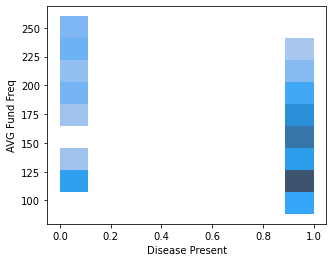

In [19]:
plt.figure(figsize=(5,4))
sns.histplot(data=raw, x='Disease Present', y='AVG Fund Freq', stat='count')

Fractal Scaling Exponent: Recent Audio Feature

<AxesSubplot:xlabel='Disease Present', ylabel='Fractal Scaling Exponent'>

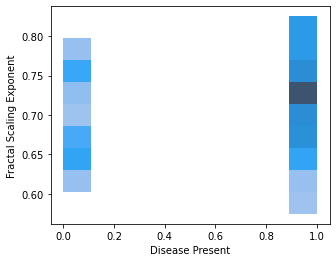

In [20]:
plt.figure(figsize=(5,4))
sns.histplot(data=raw, x='Disease Present', y='Fractal Scaling Exponent', stat='count', legend='true')

Distribution of target variable

<AxesSubplot:xlabel='Disease Present', ylabel='count'>

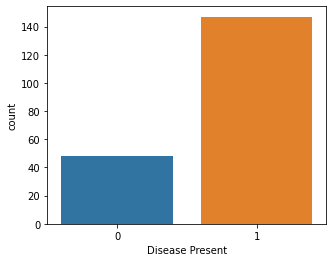

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x='Disease Present', data=raw)

Previous Sections Completed by George Marfo and Anthony Mascaro

<AxesSubplot:>

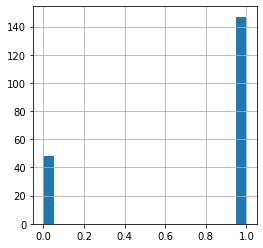

In [22]:
plt.figure(figsize=(4,4))
raw['Disease Present'].hist(bins=20)


In [23]:
feature_col = list(raw.columns)
target_col = feature_col.pop(feature_col.index('Disease Present'))

f_df = raw[feature_col].drop(['Patient'],axis=1)
t_vec = raw[target_col]

f_df.head(2)

,AVG Fund Freq,MAX Fund Freq,MIN Fund Freq,Var Fund %,Var Fund Abs,Var Fund RAP,Var Fund PPQ,Var Fund Jitter DDP,Var Amp,Var Amp dB,...,Var Amp APQ,Var Amp DDA,Tonal Ratio NHR,Tonal Ratio HNR,Nonlinear Complexity Measure 1,Fractal Scaling Exponent,Nonlinear Freq Var Measure 1,Nonlinear Freq Var Measure 2,Nonlinear Complexity Measure 2,Nonlinear Freq Var Measure 3
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [24]:
print(f_df.shape)
print(t_vec.shape)


(195, 22)
(195,)


In [25]:
ros = RandomOverSampler(random_state=0)

f_resamp, t_resamp = ros.fit_resample(f_df,t_vec)


In [26]:

print(f_resamp.shape)
print(t_resamp.shape)


(294, 22)
(294,)


<AxesSubplot:>

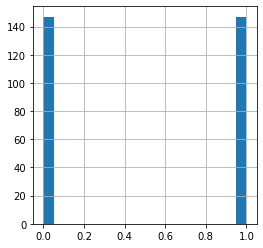

In [27]:

plt.figure(figsize=(4,4))
t_resamp.hist(bins=20)

In [28]:
scale = StandardScaler()
f_sdf = scale.fit_transform(f_resamp)


<AxesSubplot:>

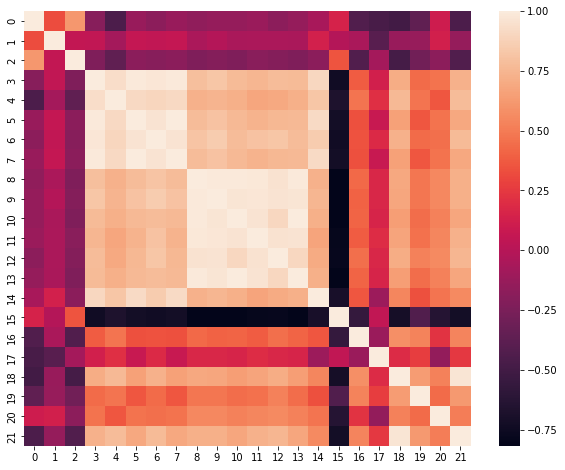

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(f_sdf).corr('pearson'),annot=False)

Previous section completed by George Marfo

### ML Algorithm 1: Principal Component Analysis (Completed by George Marfo)

In [30]:
pca = PCA(n_components=2)
PC = pca.fit_transform(f_sdf)


In [31]:
new_df = pd.concat([pd.DataFrame(f_sdf,columns=f_df.columns),pd.DataFrame(PC,columns=['principal component 1','principal component 2']),t_vec],axis=1)


In [32]:
new_df.head()

,AVG Fund Freq,MAX Fund Freq,MIN Fund Freq,Var Fund %,Var Fund Abs,Var Fund RAP,Var Fund PPQ,Var Fund Jitter DDP,Var Amp,Var Amp dB,...,Tonal Ratio HNR,Nonlinear Complexity Measure 1,Fractal Scaling Exponent,Nonlinear Freq Var Measure 1,Nonlinear Freq Var Measure 2,Nonlinear Complexity Measure 2,Nonlinear Freq Var Measure 3,principal component 1,principal component 2,Disease Present
0,-0.911327,-0.496743,-1.026800,0.598612,1.077682,0.362834,1.092622,0.361461,1.102837,1.093011,...,-0.467918,-0.649918,1.904117,1.134675,0.739893,0.017327,1.223678,3.403536,-1.600817,1.0
1,-0.859214,-0.584569,-0.213839,1.034964,1.400099,0.733470,1.685422,0.732095,2.155393,2.256674,...,-0.912966,-0.229650,1.982781,1.807047,1.562860,0.516923,2.179362,6.255207,-1.314143,1.0
2,-0.982960,-0.762607,-0.261249,1.229425,1.722515,1.041683,2.040267,1.042908,1.616556,1.418837,...,-0.555191,-0.504171,2.089878,1.471711,1.272092,0.127308,1.769426,5.345317,-1.425098,1.0
3,-0.983090,-0.693986,-0.265207,1.103737,1.722515,0.877823,1.693771,0.876448,1.771449,1.622478,...,-0.556791,-0.455235,1.977470,1.768492,1.545676,0.297857,2.182785,5.634491,-1.588480,1.0
4,-0.997416,-0.654296,-0.280096,1.784350,2.367348,1.474743,2.570447,1.475966,2.329424,2.012305,...,-0.784112,-0.625103,2.056376,2.105402,0.359193,0.100150,2.653234,7.388568,-0.972741,1.0


In [33]:
def loading_plot(coeff, labels, scale=1, colors=None, visible=None, ax=plt, arrow_size=0.5):
# '''display the loadings for principal conponent analysis '''

    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="#000" if colors is None else colors[i],
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                color="#000" if colors is None else colors[i],
                ha="center",
                va="center",
            )



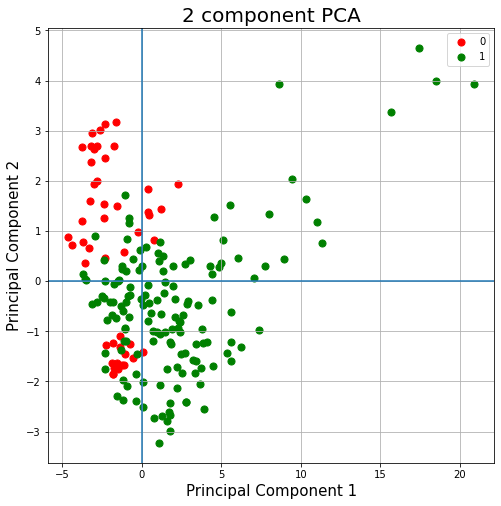

In [34]:
# create a biplot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = new_df['Disease Present'] == target
    ax.scatter(new_df.loc[indicesToKeep, 'principal component 1']
               , new_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.axvline(x=0)
plt.axhline(0)

# loading_plot(pd.DataFrame(PC,columns=['principal component 1','principal component 2']).values, 
# pd.DataFrame(PC,columns=['principal component 1','principal component 2']).index, scale=2, arrow_size=0.00001)


No major seperation seen between variables

In [35]:
pca.explained_variance_ratio_

array([0.60150913, 0.11284962])

In [36]:
f_sdf.shape

(294, 22)

In [37]:
t_resamp.shape

(294,)

### ML Algorithm 2: Logistic Regression Model (Completed by Anthony Mascaro)

The logistic regression model could not be completed with existing data as an iteration limit was reached.  The data was scaled down in order to complete the algorithm.

In [38]:
raw.head()

,Patient,AVG Fund Freq,MAX Fund Freq,MIN Fund Freq,Var Fund %,Var Fund Abs,Var Fund RAP,Var Fund PPQ,Var Fund Jitter DDP,Var Amp,...,Var Amp DDA,Tonal Ratio NHR,Tonal Ratio HNR,Disease Present,Nonlinear Complexity Measure 1,Fractal Scaling Exponent,Nonlinear Freq Var Measure 1,Nonlinear Freq Var Measure 2,Nonlinear Complexity Measure 2,Nonlinear Freq Var Measure 3
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [39]:
df_scaled = pd.DataFrame(scale.fit_transform(raw.values), columns=raw.columns, index=raw.index)

In [40]:
df_scaled.head()

,Patient,AVG Fund Freq,MAX Fund Freq,MIN Fund Freq,Var Fund %,Var Fund Abs,Var Fund RAP,Var Fund PPQ,Var Fund Jitter DDP,Var Amp,...,Var Amp DDA,Tonal Ratio NHR,Tonal Ratio HNR,Disease Present,Nonlinear Complexity Measure 1,Fractal Scaling Exponent,Nonlinear Freq Var Measure 1,Nonlinear Freq Var Measure 2,Nonlinear Complexity Measure 2,Nonlinear Freq Var Measure 3
0,-1.723191,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,...,0.607532,-0.067893,-0.193225,0.571429,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-1.705426,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,...,1.548254,-0.137843,-0.634508,0.571429,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-1.687661,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,...,1.175323,-0.291633,-0.279760,0.571429,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-1.669897,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,...,1.340229,-0.280719,-0.281346,0.571429,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-1.652132,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,...,1.899461,-0.178026,-0.506745,0.571429,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [41]:
X = df_scaled.loc[:,df_scaled.columns !='Disease Present'].drop(['Patient'],axis=1)
y = raw['Disease Present']

Regression completed with test size of 20%

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
predictions = model.predict(X_test)

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.82      0.82      0.82        28

    accuracy                           0.74        39
   macro avg       0.68      0.68      0.68        39
weighted avg       0.74      0.74      0.74        39



In [47]:
accuracy_score(y_test, predictions)

0.7435897435897436

In [48]:
err_matrix_ = confusion_matrix(y_test, predictions)
err_matrix_

array([[ 6,  5],
       [ 5, 23]], dtype=int64)

<AxesSubplot:>

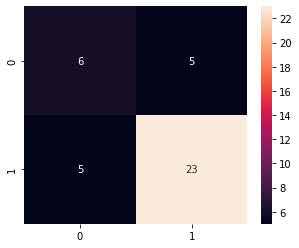

In [49]:
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix_,annot=True)

<AxesSubplot:>

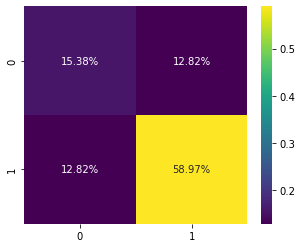

In [50]:
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix_/np.sum(err_matrix_), annot=True,fmt='.2%', cmap='viridis')

Test size increased to 30%

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
predictions = model.predict(X_test)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.41      0.58      0.48        12
           1       0.88      0.79      0.83        47

    accuracy                           0.75        59
   macro avg       0.65      0.69      0.66        59
weighted avg       0.79      0.75      0.76        59



In [56]:
accuracy_score(y_test, predictions)

0.7457627118644068

In [57]:
err_matrix_ = confusion_matrix(y_test, predictions)
err_matrix_

array([[ 7,  5],
       [10, 37]], dtype=int64)

<AxesSubplot:>

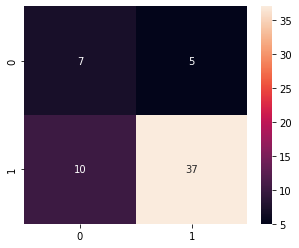

In [58]:
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix_,annot=True)

<AxesSubplot:>

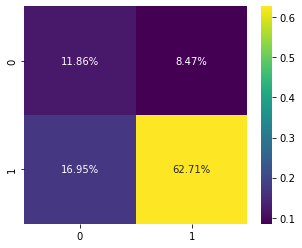

In [59]:
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix_/np.sum(err_matrix_), annot=True,fmt='.2%', cmap='viridis')

The accuracy of the model was identical when increasing the size of the training data from 20% to 30%. The accuracy was reported as 0.74, where precision and recall at 30% improved the model.

In [60]:
fpr_,tpr_,threshold_ = roc_curve(y_test, predictions)

In [61]:
print('False Positive Rate',fpr_)
print('True Positive Rate',tpr_)
print('Threshold',threshold_)


False Positive Rate [0.         0.41666667 1.        ]
True Positive Rate [0.         0.78723404 1.        ]
Threshold [2 1 0]


<Figure size 288x360 with 0 Axes>

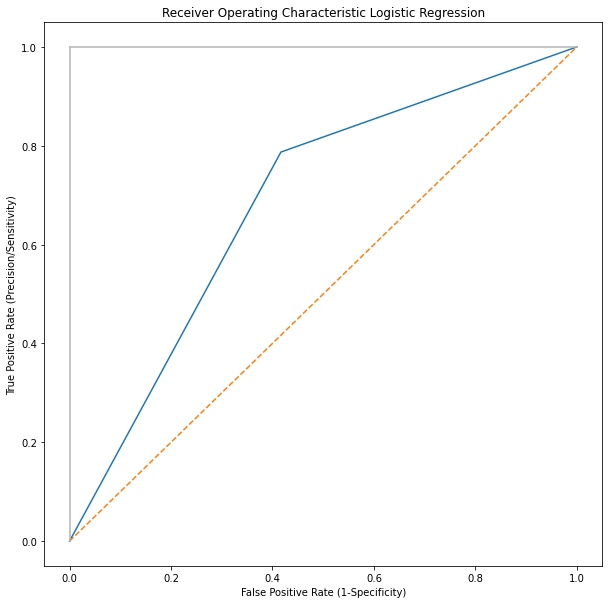

In [62]:
plt.figure(figsize=(4,5))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic Logistic Regression')
plt.plot(fpr_,tpr_)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Precision/Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()


#### Hyperparameter tuning for logistic regression

Tuning with different solver methods and an L2 penalty

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [64]:
regularized_lr=LogisticRegression(penalty='l2',solver='newton-cg',max_iter=200)
regularized_lr.fit(X_train,y_train)
reg_pred=regularized_lr.predict(X_test)

Precision score 0.88
Recall score 0.79


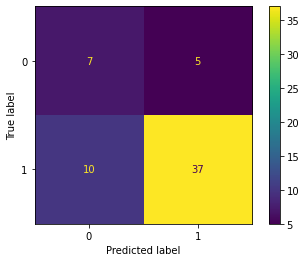

In [65]:
print('Precision score',np.round(precision_score(y_test,reg_pred),2))
print('Recall score',np.round(recall_score(y_test,reg_pred),2))
cm_reg = confusion_matrix(y_test, reg_pred, labels=regularized_lr.classes_)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg,display_labels=regularized_lr.classes_)
disp_reg.plot()
plt.show()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [67]:
regularized_lr=LogisticRegression(penalty='l2',solver='liblinear',max_iter=200)
regularized_lr.fit(X_train,y_train)
reg_pred=regularized_lr.predict(X_test)

Precision score 0.9
Recall score 0.79


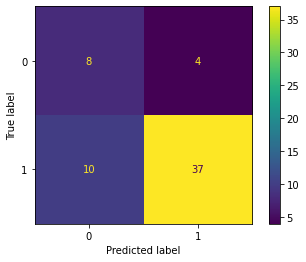

In [68]:
print('Precision score',np.round(precision_score(y_test,reg_pred),2))
print('Recall score',np.round(recall_score(y_test,reg_pred),2))
cm_reg = confusion_matrix(y_test, reg_pred, labels=regularized_lr.classes_)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg,display_labels=regularized_lr.classes_)
disp_reg.plot()
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [70]:
regularized_lr=LogisticRegression(penalty='l2',solver='lbfgs',max_iter=200)
regularized_lr.fit(X_train,y_train)
reg_pred=regularized_lr.predict(X_test)

Precision score 0.88
Recall score 0.79


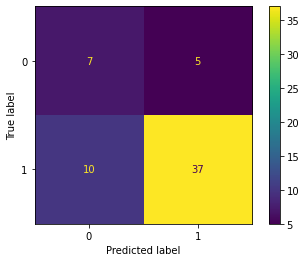

In [71]:
print('Precision score',np.round(precision_score(y_test,reg_pred),2))
print('Recall score',np.round(recall_score(y_test,reg_pred),2))
cm_reg = confusion_matrix(y_test, reg_pred, labels=regularized_lr.classes_)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg,display_labels=regularized_lr.classes_)
disp_reg.plot()
plt.show()

Liblinear produced the highest precison and recall (sensitivity) scores of the 3 solver techniques.

#### Adjusting penalties

Newton-cg and lbgfs do not support L1 penalties so they were not evaluated

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [73]:
regularized_lr=LogisticRegression(penalty='l1',solver='liblinear',max_iter=200)
regularized_lr.fit(X_train,y_train)
reg_pred=regularized_lr.predict(X_test)

Precision score 0.9
Recall score 0.79


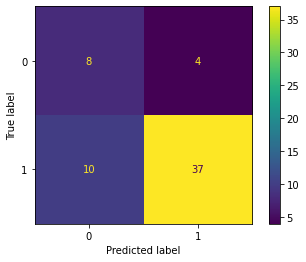

In [74]:
print('Precision score',np.round(precision_score(y_test,reg_pred),2))
print('Recall score',np.round(recall_score(y_test,reg_pred),2))
cm_reg = confusion_matrix(y_test, reg_pred, labels=regularized_lr.classes_)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg,display_labels=regularized_lr.classes_)
disp_reg.plot()
plt.show()

Changing the l1/l2 norm had no impact

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [76]:
regularized_lr=LogisticRegression(penalty='l1',solver='liblinear',max_iter=200)
regularized_lr.fit(X_train,y_train)
reg_pred=regularized_lr.predict(X_test)

In [77]:
f1_logreg = f1_score(y_test,reg_pred)

Precision score 0.85
Recall score 0.82


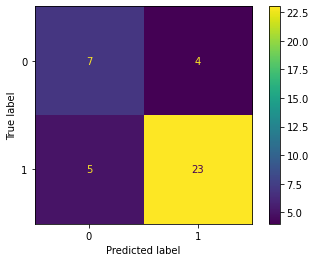

In [78]:
print('Precision score',np.round(precision_score(y_test,reg_pred),2))
print('Recall score',np.round(recall_score(y_test,reg_pred),2))
cm_reg = confusion_matrix(y_test, reg_pred, labels=regularized_lr.classes_)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg,display_labels=regularized_lr.classes_)
disp_reg.plot()


The linear regression performed the best using a test size of 30%, the L1/l2 penalty, and the solver method of liblinear.  This method was able to reach the highest precision (0.90) and recall scores (0.79).

In order to fit the ensembled model, we selected the model with the 0.2 test split.

### ML Algorithm 3: Support Vector Machine (Completed by George Marfo)

In [79]:
x_train_,x_test_,y_train_,y_test_ = train_test_split(f_df,t_vec,train_size=0.8,random_state=12)

In [80]:
print(x_train_.shape)
print(y_train_.shape)

(156, 22)
(156,)


In [81]:
svm = SVC()

svm.fit(x_train_,y_train_)

y_pred_ = svm.predict(x_test_)


     

In [82]:
accuracy_score(y_test_,y_pred_)

0.7948717948717948

In [83]:
err_matrix_ = confusion_matrix(y_test_,y_pred_)
err_matrix_


array([[ 2,  8],
       [ 0, 29]], dtype=int64)

<AxesSubplot:>

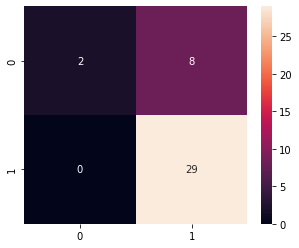

In [84]:
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix_,annot=True)


<AxesSubplot:>

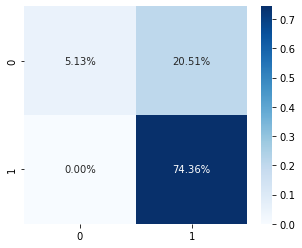

In [85]:
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix_/np.sum(err_matrix_), annot=True,fmt='.2%', cmap='Blues')

In [86]:
fpr_,tpr_,threshold_ = roc_curve(y_test_,y_pred_)

In [87]:
print('False Positive Rate',fpr_)
print('True Positive Rate',tpr_)
print('Threshold',threshold_)


False Positive Rate [0.  0.8 1. ]
True Positive Rate [0. 1. 1.]
Threshold [2 1 0]


<Figure size 288x360 with 0 Axes>

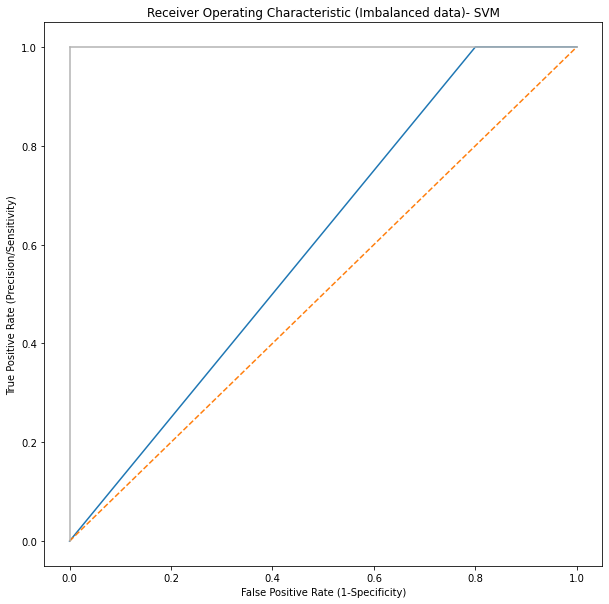

In [88]:
plt.figure(figsize=(4,5))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (Imbalanced data)- SVM')
plt.plot(fpr_,tpr_)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Precision/Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()


In [89]:
print('Auc score:', roc_auc_score(y_test_,y_pred_))

Auc score: 0.6


In [90]:
x_train,x_test,y_train,y_test = train_test_split(f_sdf,t_resamp,train_size=0.8,random_state=12)

In [91]:
print(x_train.shape)
print(y_train.shape)


(235, 22)
(235,)


In [92]:

svm = SVC()

svm.fit(x_train,y_train)

y_pred = svm.predict(x_test)



In [93]:
accuracy_score(y_test,y_pred)


0.9152542372881356

In [94]:
f1_svm = f1_score(y_test,y_pred)

In [95]:
err_matrix = confusion_matrix(y_test,y_pred)
err_matrix

array([[38,  0],
       [ 5, 16]], dtype=int64)

<AxesSubplot:>

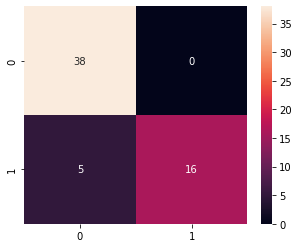

In [96]:
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix,annot=True)


<AxesSubplot:>

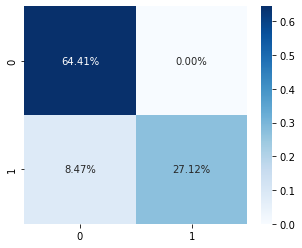

In [97]:
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix/np.sum(err_matrix), annot=True,fmt='.2%', cmap='Blues')


In [98]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)


In [99]:
print('False Positive Rate',fpr)
print('True Positive Rate',tpr)
print('Threshold',threshold)


False Positive Rate [0. 0. 1.]
True Positive Rate [0.         0.76190476 1.        ]
Threshold [2 1 0]


<Figure size 288x360 with 0 Axes>

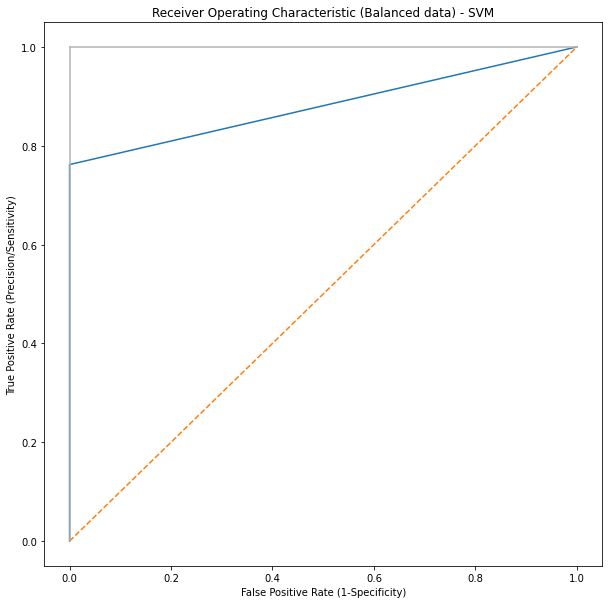

In [100]:
plt.figure(figsize=(4,5))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (Balanced data) - SVM')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Precision/Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()


In [101]:
print('Auc score:', roc_auc_score(y_test,y_pred))


Auc score: 0.8809523809523809


In [102]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [103]:
tune_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [104]:
x_train,x_test,y_train,y_test = train_test_split(f_sdf,t_resamp,train_size=0.8,random_state=12)

tune_svm.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [105]:
print(tune_svm.best_estimator_)

SVC(C=1, gamma=1)


In [106]:
y_pred_tune = tune_svm.predict(x_test)

In [107]:
accuracy_score(y_test,y_pred_tune)

0.9322033898305084

In [108]:
tuned_svm = f1_score(y_test,y_pred_tune)

In [109]:
err_matrix = confusion_matrix(y_test,y_pred_tune)
err_matrix


array([[34,  4],
       [ 0, 21]], dtype=int64)

<AxesSubplot:>

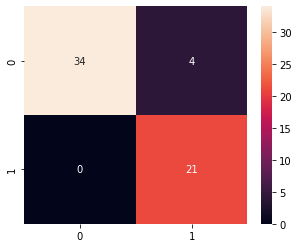

In [110]:
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix,annot=True)


In [111]:
_fpr,_tpr,_threshold = roc_curve(y_test,y_pred_tune)

In [112]:
print('False Positive Rate',_fpr)
print('True Positive Rate',_tpr)
print('Threshold',_threshold)


False Positive Rate [0.         0.10526316 1.        ]
True Positive Rate [0. 1. 1.]
Threshold [2 1 0]


<Figure size 288x360 with 0 Axes>

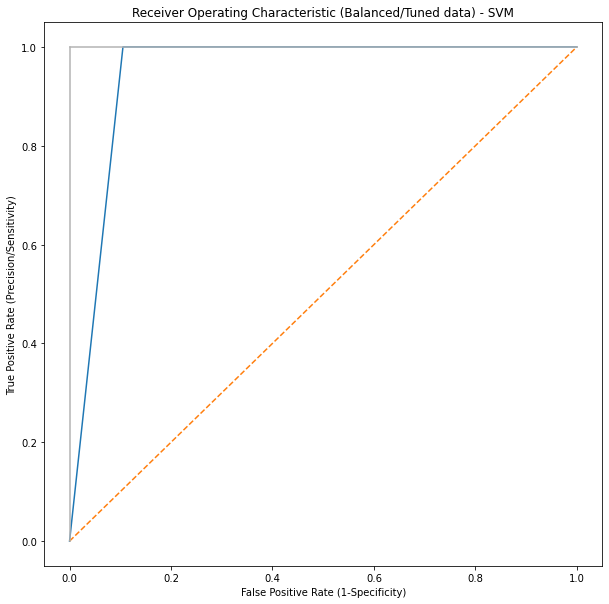

In [113]:
plt.figure(figsize=(4,5))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (Balanced/Tuned data) - SVM')
plt.plot(_fpr,_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Precision/Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()


In [114]:
print('Auc score:', roc_auc_score(y_test,y_pred_tune))

Auc score: 0.9473684210526316


# ML Algorithm 4: Random Forest Model (Completed by Matthew Benvenuto)

In [115]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
param_grid = { 
    'n_estimators': [50,100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'entropy']
}

rf_model = RandomForestClassifier()
search_randomForest = GridSearchCV(rf_model, param_grid, cv=2)
search_randomForest.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['mse', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]})

In [116]:
print("Using the random forest grid search, the best score was found to be: " , search_randomForest.best_score_)
print("Using the random forest grid search, the best parameters that were tuned were found to be: " , search_randomForest.best_params_)

Using the random forest grid search, the best score was found to be:  0.891025641025641
Using the random forest grid search, the best parameters that were tuned were found to be:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [117]:
predicted_values = search_randomForest.predict(X_test)
accuracy=accuracy_score(y_test, predicted_values)

print(accuracy)
print(classification_report(y_test, predicted_values))

0.8974358974358975
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.88      1.00      0.93        28

    accuracy                           0.90        39
   macro avg       0.94      0.82      0.86        39
weighted avg       0.91      0.90      0.89        39



<AxesSubplot:>

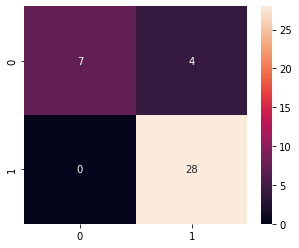

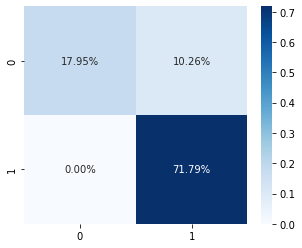

In [118]:
err_matrix = confusion_matrix(y_test,predicted_values)
err_matrix
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix,annot=True)
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix/np.sum(err_matrix), annot=True,fmt='.2%', cmap='Blues')

<Figure size 288x360 with 0 Axes>

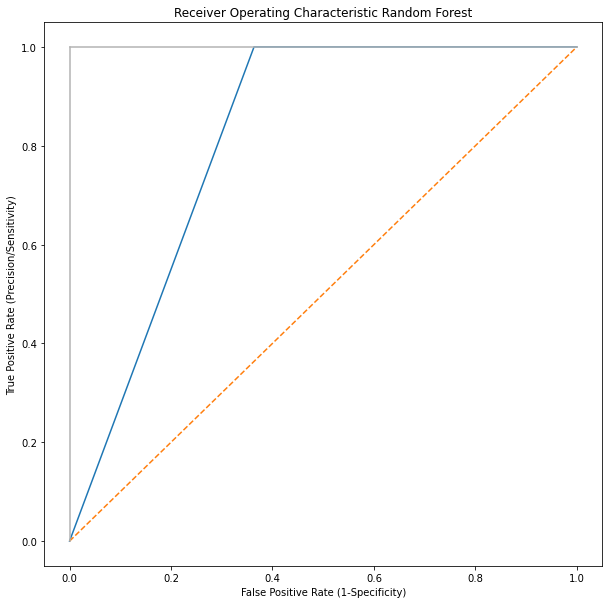

In [119]:

fpr_,tpr_,threshold_ = roc_curve(y_test, predicted_values)

plt.figure(figsize=(4,5))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic Random Forest')
plt.plot(fpr_,tpr_)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Precision/Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

 # ML Algorithm 5:  Voting Classifier Implemented by Matthew Benvenuto

0.8717948717948718
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.85      1.00      0.92        28

    accuracy                           0.87        39
   macro avg       0.92      0.77      0.81        39
weighted avg       0.89      0.87      0.86        39



<AxesSubplot:>

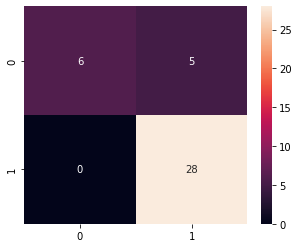

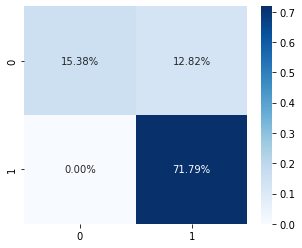

In [120]:
###Evaluating comparisons

regularized_lr=LogisticRegression(penalty='l1',solver='liblinear',max_iter=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

clf1 = LogisticRegression(penalty='l1',solver='liblinear',max_iter=200)
clf2 = RandomForestClassifier(criterion='entropy',max_depth=5,max_features='sqrt',n_estimators=50)
clf3 = SVC(C=1,gamma=1, probability=True)


eclf = VotingClassifier(
    estimators=[("lr", clf1), ("rf", clf2), ("svm", clf3)],
    voting="soft",
    weights=[2,2,.5],
)

eclf.fit(X_train,y_train)
eclf_predicted = eclf.predict(X_test)
accuracy=accuracy_score(y_test, eclf_predicted)

print(accuracy)
print(classification_report(y_test, eclf_predicted))

err_matrix = confusion_matrix(y_test,eclf_predicted)
err_matrix
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix,annot=True)
plt.figure(figsize=(5,4))
sns.heatmap(err_matrix/np.sum(err_matrix), annot=True,fmt='.2%', cmap='Blues')

<Figure size 288x360 with 0 Axes>

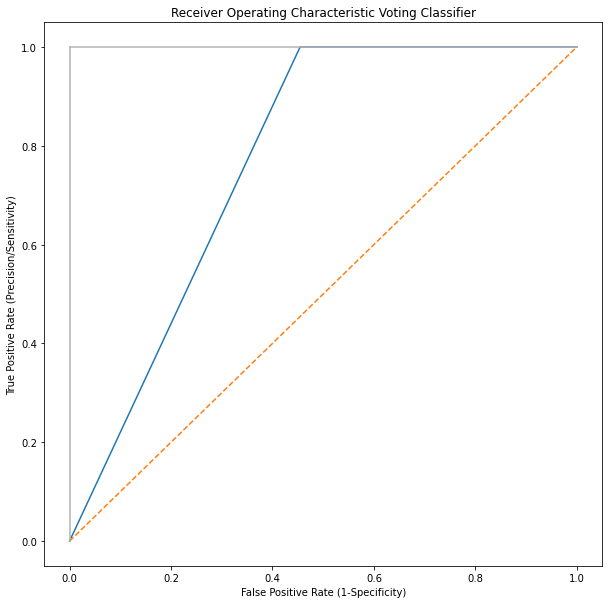

In [121]:

fpr_,tpr_,threshold_ = roc_curve(y_test, eclf_predicted)

plt.figure(figsize=(4,5))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic Voting Classifier')
plt.plot(fpr_,tpr_)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Precision/Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

# Plotting the breakdown of the Voting Classifier (Completed by Matthew Benvenuto)

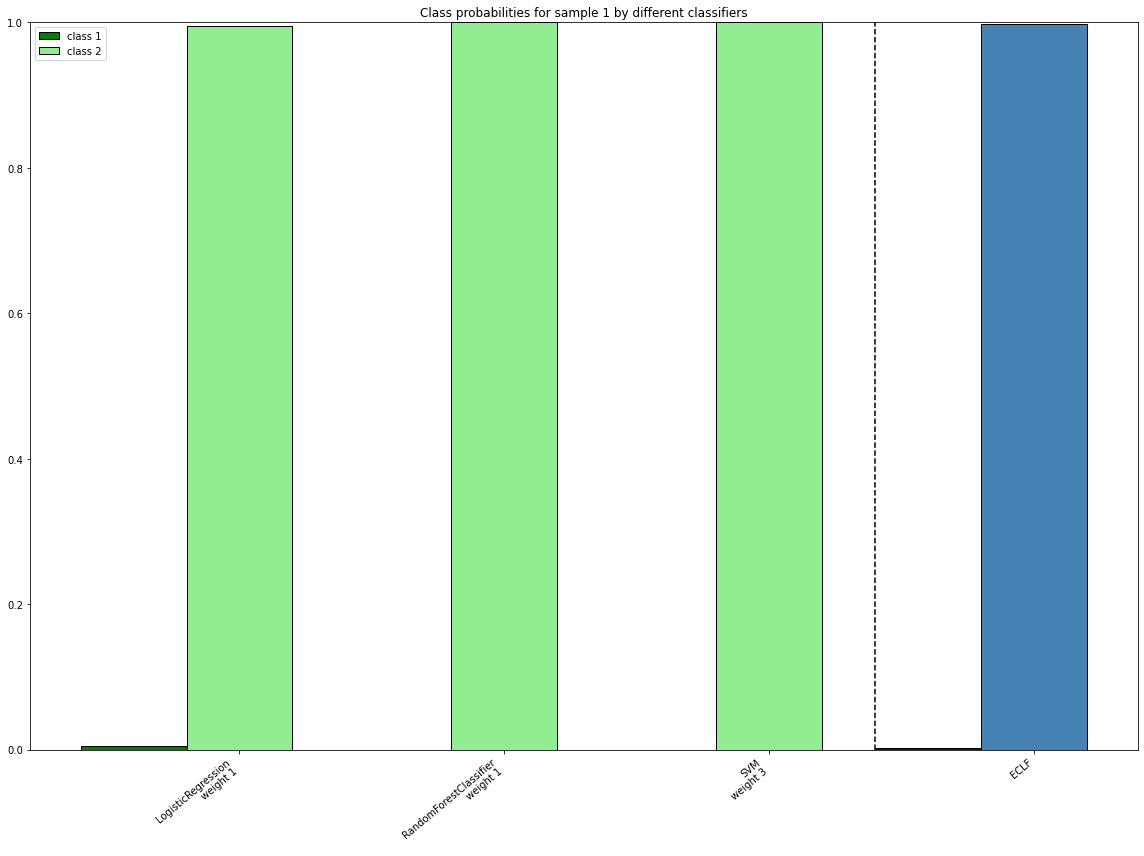

In [122]:
# predict class probabilities for all classifiers
probas = [c.fit(X_train, y_train).predict_proba(X) for c in (clf1, clf2,clf3,eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.4  # bar width

fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression\nweight 1",
        "RandomForestClassifier\nweight 1",
        "SVM\nweight 3",
        "ECLF"
    ],
    rotation=40,
    ha="right",
)

plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["class 1", "class 2"], loc="upper left")
plt.tight_layout()
plt.show()

In [123]:
from sklearn.model_selection import cross_val_score

param_grid_mega = { 
    'voting':['hard', 'soft'],
          'weights':[(1,1,1), (2,1,1), (1,2,1), (1,1,1), (1,1,2)]
}
mega = GridSearchCV(estimator=eclf, param_grid=param_grid_mega, cv=2, verbose=1)
mega.fit(X_train, y_train)

print(mega.best_params_) 
print('vc cross_val_score with GridSearch:' + str(cross_val_score(mega, X_train, y_train, scoring='accuracy', cv=10).mean()))

'''overview_results = []
overview_results = overview_results.append({'classifier' : 'vc_plus_gridsearch' , 'cross_val_score' :0.9104166666666668} , ignore_index=True)
overview_results.sort_values(by='cross_val_score', ascending=False)'''

Fitting 2 folds for each of 10 candidates, totalling 20 fits
{'voting': 'soft', 'weights': (1, 1, 2)}
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
vc cross_val_score with GridSearch:0.9420833333333334


"overview_results = []\noverview_results = overview_results.append({'classifier' : 'vc_plus_gridsearch' , 'cross_val_score' :0.9104166666666668} , ignore_index=True)\noverview_results.sort_values(by='cross_val_score', ascending=False)"

# Comparison of different ML Techniques (Completed by Matthew Benvenuto)

## What is calibration plot?  

### Calibration plot is a visual tool to assess the agreement between predictions and observations in different percentiles (mostly deciles) of the predicted values. calibration_plot function constructs calibration plots based on provided predictions and observations columns of a given dataset. 

### Calibration curves are used to evaluate how calibrated a classifier is i.e., how the probabilities of predicting each class label differ.

### The x-axis represents the average predicted probability in each bin. The y-axis is the ratio of positives (the proportion of positive predictions). The curve of the ideal calibrated model is a linear straight line from (0, 0) moving linearly. 

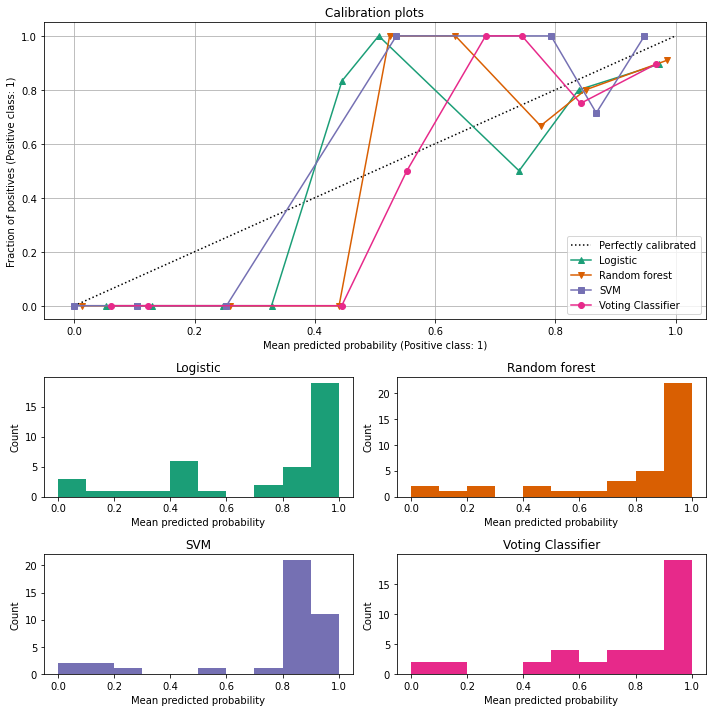

In [124]:

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

# Create classifiers
regularized_lr = LogisticRegression(penalty='l1',solver='liblinear',max_iter=200)

lr = regularized_lr
svm = SVC(C=1, gamma=1,probability=True)
rfc = search_randomForest
rfc = RandomForestClassifier(criterion='entropy',max_depth=5,max_features='sqrt',n_estimators=50)

clf_list = [
    (lr, "Logistic"),
    (rfc, "Random forest"),
    (svm,"SVM"),
    (eclf,"Voting Classifier")
]


ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

### From the plot, we can see that there is room to calibrate our models further.

# Conclusion (Completed by Matthew Benvenuto, George Marfo, and Anthony Mascaro)

In [125]:
print('F1_score Random forest:',f1_score(y_test,predicted_values))
print('F1_score Ensembled:',f1_score(y_test,eclf_predicted))
print('F1_score Logistic Regression:',f1_logreg)
print('F1_score SVM:',f1_svm)
print('F1_score Tuned_SVM:',tuned_svm)


F1_score Random forest: 0.9333333333333333
F1_score Ensembled: 0.9180327868852458
F1_score Logistic Regression: 0.8363636363636364
F1_score SVM: 0.8648648648648648
F1_score Tuned_SVM: 0.9130434782608696


Looking at the F1 score, the Random Forest classifier performed the best at classifying a patient with Parkinson's